### Which Machine LEarning Models Are Sensitive To Outliers?
* Naivye Bayes Classifier ------ Not Sensitive To Outliers
* SVM -------------------------- Not Sensitive To Outliers
* Linear Regression------------- Sensitive To Outliers
* Logistic Regression----------- Sensitive To Outliers
* DecisionTree ----------------- Not Sensitive
* Ensemble(RF,XGboost,GB)--- Not Sensitive
* KNN--------------------------- Not Sensitive
* Kmeans------------------------ Sensitive
* Hierarichal--------------------- Sensitive
* PCA--------------------------- Sensitive
* Neural Networks------------- Sensitive

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
df.Age.isnull().sum()

177

In [4]:
df.Age = df.Age.dropna()

<AxesSubplot:>

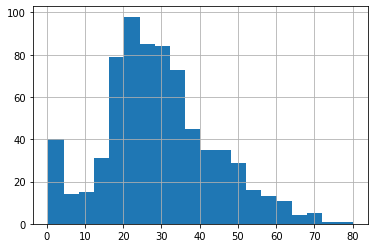

In [5]:
df.Age.hist(bins=20)

<AxesSubplot:>

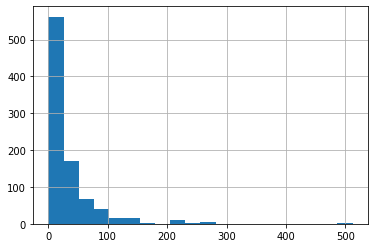

In [6]:
df.Fare.hist(bins=20)

In [7]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## Gaussian Distributed

Text(0, 0.5, 'No of passenger')

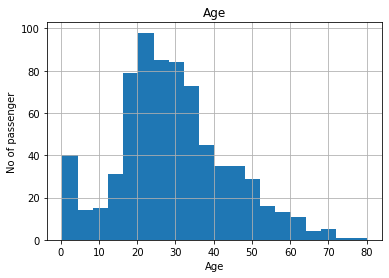

In [8]:
figure=df.Age.hist(bins=20)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

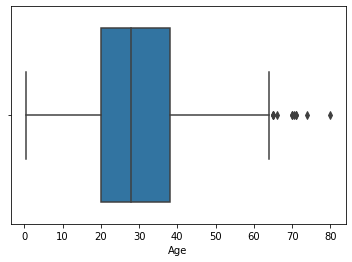

In [9]:
import seaborn as sns
sns.boxplot(df['Age'])

### If the data is normally distributed use this method:

In [10]:
Lower_boundaary = df.Age.mean() - 3 * df.Age.std()
Upper_boundaary = df.Age.mean() + 3 * df.Age.std()
print(f"Upper Boundaary: {Upper_boundaary}")
print(f"Lower Boundaary: {Lower_boundaary}")
print(f"Mean of Age: {df.Age.mean()}")

Upper Boundaary: 73.27860964406094
Lower Boundaary: -13.880374349943303
Mean of Age: 29.69911764705882


#### Replace outliers with upper boundary limit

In [11]:
df.loc[df['Age']>=73, 'Age']=73

<AxesSubplot:>

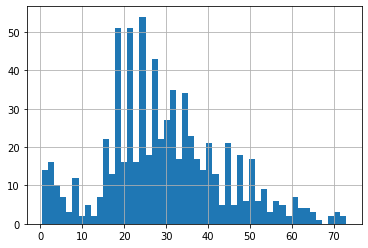

In [12]:
df.Age.hist(bins=50)

## Skewed Distribution:

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

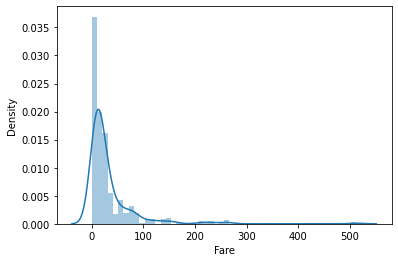

In [17]:
sns.distplot(df.Fare)

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

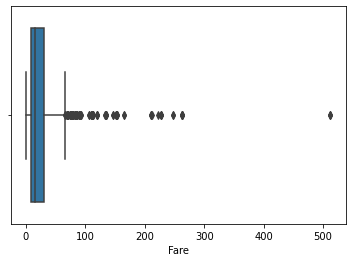

In [20]:
sns.boxplot(df.Fare)

In [22]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### If the data is skewed distribution use this method

In [23]:
# Find IQR value
IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
print(f"InterQuartile Range : {IQR}")

InterQuartile Range : 23.0896


In [25]:
# Apply IQR value in the Formula
Lower_boundaary = df.Fare.quantile(0.25) - (1.5*IQR)
Upper_boundaary = df.Fare.quantile(0.75) + (1.5*IQR)
print(f"Upper Boundaary: {Upper_boundaary}")
print(f"Lower Boundaary: {Lower_boundaary}")

Upper Boundaary: 65.6344
Lower Boundaary: -26.724


#### Find Extreme Outlier
     Instead 1.5 value use 3 to find the extreme outliers

In [26]:
Lower_boundaary = df.Fare.quantile(0.25) - (3*IQR)
Upper_boundaary = df.Fare.quantile(0.75) + (3*IQR)
print(f"Upper Boundaary: {Upper_boundaary}")
print(f"Lower Boundaary: {Lower_boundaary}")

Upper Boundaary: 100.2688
Lower Boundaary: -61.358399999999996


#### Replace Outliers with Upper Boundary value

In [27]:
df.loc[df['Fare']>=100, 'Fare']=100

<AxesSubplot:>

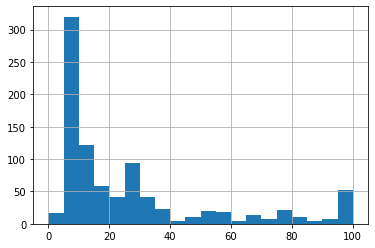

In [30]:
df.Fare.hist(bins=20)

#### Splitting dataset for train_test_split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'Fare']].fillna(0), df['Survived'], test_size=0.2, random_state=0)

#### Using LogisticRegressor

In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)

In [46]:
from sklearn.metrics import accuracy_score, roc_auc_score
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')
print(f'Roc Accuracy Score : {roc_auc_score(y_test, y_pred_prob[:,1])}')


Accuracy Score : 0.7206703910614525
Roc Accuracy Score : 0.7490777338603425


#### Using Ensemble Techniques

In [51]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
y_pred_prob = RFC.predict_proba(X_test)

In [53]:
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')
print(f'Roc Accuracy Score : {roc_auc_score(y_test, y_pred_prob[:,1])}')

Accuracy Score : 0.7262569832402235
Roc Accuracy Score : 0.7403820816864295
